In [14]:
import wandb

api = wandb.Api()
first_runs = api.runs(path = 'yanyiphei/transformer_dropout_4', filters={"sweep": "jwsy06vy", "state": "finished", "config.model_config.learned_dropout_config.use_detached_x_in_dropout_mask": True}, per_page = 23739)
second_runs = api.runs(path = 'yanyiphei/transformer_dropout_4', filters={"sweep": "dmkknxru", "state": "finished"}, per_page = 23739)
len(first_runs), len(second_runs)

(11818, 11279)

In [21]:
first_data_dict = [{"est_val_loss":run.summary_metrics['est_val_loss'],
              "loss": run.summary_metrics['loss'],
               "index": i,
               "color": "blue",
               "est_val_accuracy": run.summary_metrics['est_val_accuracy'],
               "entropy": run.summary_metrics['dropout_entropy'],
               "dropout_l1_norm": run.summary_metrics['dropout_l1_norm'],
               } 
               for i, run in enumerate(first_runs)]
second_data_dict = [{"est_val_loss":run.summary_metrics['est_val_loss'],
              "loss": run.summary_metrics['loss'],
               "index": i,
               "color": "red",
               "est_val_accuracy": run.summary_metrics['est_val_accuracy'],
                "entropy": run.summary_metrics['dropout_entropy'],
               "dropout_l1_norm": run.summary_metrics['dropout_l1_norm'],
               } 
               for i, run in enumerate(second_runs)]

In [26]:
x = [d["index"] for d in first_data_dict] + [d["index"] for d in second_data_dict]
y = [d["dropout_l1_norm"] for d in first_data_dict] + [d["dropout_l1_norm"] for d in second_data_dict]
colors = [d["color"] for d in first_data_dict] + [d["color"] for d in second_data_dict] 

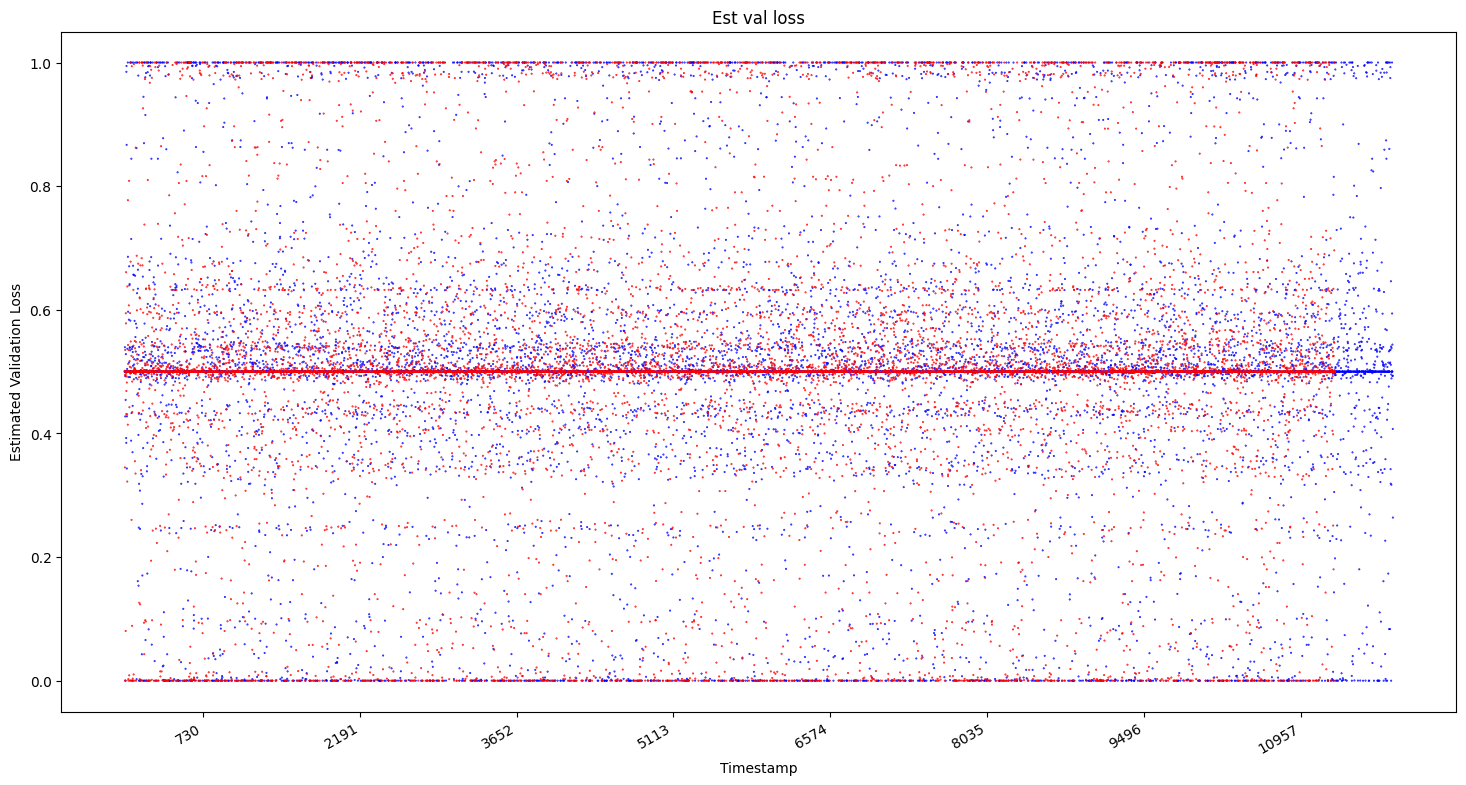

In [27]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


plt.figure(figsize=(18, 10))
plt.scatter(x, y, c=colors, s = 0.2)

plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

# Auto-format the date labels for readability
plt.gcf().autofmt_xdate()


# Customizing the plot
plt.xlabel('Timestamp')
plt.ylabel('Estimated Validation Loss')
plt.title('Est val loss')

ymin, ymax = plt.ylim()
# plt.ylim(ymin, 1.28)  # Adjust this line as needed

plt.show()